In [36]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

import os
import os.path
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import mltools as ml
from PIL import Image

from pprint import pprint

In [7]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [20]:
edges = [[0,1],[1,2],[2,3],[3,4],[0,5],[5,6],[6,7],[7,8],[0,9],[9,10],[10,11],[11,12],[0,13],[13,14],[14,15],[15,16],[0,17],[17,18],[18,19],[19,20]]


paths = ['synth1/', 'synth2/', 'synth3/', 'synth4/']
paths = ['hand_labels_synth/synth2/', 'hand_labels_synth/synth3/']
inpath2 = paths[0]
inpath3 = paths[1]

# files contain the 00000001.json - 00003243.json files sorted
files2 = sorted([f for f in os.listdir(inpath2) if f.endswith('.jpg')])
files3 = sorted([f for f in os.listdir(inpath3) if f.endswith('.jpg')])

In [21]:
img = mpimg.imread(inpath+files2[0])

In [22]:
print(len(img), 'x', len(img[0]))

368 x 368


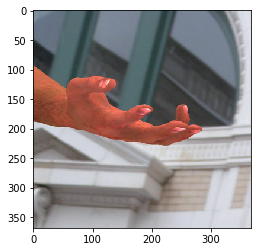

In [23]:
plt.imshow(img)

In [25]:
imgs2 = [mpimg.imread(inpath2+f) for f in files2]
imgs3 = [mpimg.imread(inpath3+f) for f in files3]

In [107]:
# ================================================================== #
#                  Input pipeline for custom dataset                 #
# ================================================================== #

img_size = 368, 368
lbl_size = 21, 3

# You should build your custom dataset as below.
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self):
        # TODO
        # 1. Initialize file paths or a list of file names. 
#         self.edges = [[0,1],[1,2],[2,3],[3,4],[0,5],
#                       [5,6],[6,7],[7,8],[0,9],[9,10],
#                       [10,11],[11,12],[0,13],[13,14],[14,15],
#                       [15,16],[0,17],[17,18],[18,19],[19,20]]

#         self.paths = ['synth1/', 'synth2/', 'synth3/', 'synth4/']
        self.paths = ['hand_labels_synth/synth2/', 'hand_labels_synth/synth3/']

        # files contain the 00000001.json - 00003243.json files sorted
#         files2 = sorted([self.paths[0]+f for f in os.listdir(self.paths[0]) if f.endswith('.jpg')])
#         files3 = sorted([self.paths[1]+f for f in os.listdir(self.paths[1]) if f.endswith('.jpg')])
        
#         self.imgs = np.chararray(5591)
        self.imgs = []
        self.labels = np.zeros((5591,21,3))
                               
        inpath2 = self.paths[0]
        cutoff = 0
        for i,f in enumerate(sorted(os.listdir(inpath2))):
            index = int(np.floor(i/2))
            
            if f.endswith('.jpg'):
                self.imgs.append((inpath2+f).encode('utf-8'))
#                 print(self.imgs[index].decode('utf-8', "ignore"))
            else:
                with open(inpath2+f, 'r') as fid:
                    dat = json.load(fid)
                self.labels[index] = np.array(dat['hand_pts'])
#                 print(self.labels[index])
#                 print("_____________________________")
            cutoff = i
    
        inpath3 = self.paths[1]
        cutoff = int((cutoff+1)/2)
        for i,f in enumerate(sorted(os.listdir(inpath3))):
            index = cutoff + int(np.floor(i/2))
            
            if f.endswith('.jpg'):
                self.imgs.append((inpath3+f).encode('utf-8'))
#                 print(self.imgs[index].decode('utf-8', "ignore"))
            else:
                with open(inpath3+f, 'r') as fid:
                    dat = json.load(fid)
                self.labels[index] = np.array(dat['hand_pts'])
#                 print(self.labels[index])

        print(len(self.imgs))
        print(np.shape(self.labels))
#         print("________________________________")
                
    def __getitem__(self, index):
        # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).
        img = Image.open(self.imgs[index])
        plt.imshow(img)
        # 2. Preprocess the data (e.g. torchvision.Transform).
        pixels = list(img.getdata())
        m = np.mean(pixels)
        s = np.std(pixels)
        img = transforms.Normalize(mean=m, std=s)
        # 3. Return a data pair (e.g. image and label).
#         print(self.labels[index])
        return (img, self.labels[index])
    def __len__(self):
        # You should change 0 to the total size of your dataset.
        return len(self.imgs)

# You can then use the prebuilt data loader. 
custom_dataset = CustomDataset()
train_loader = torch.utils.data.DataLoader(dataset=custom_dataset,
                                           batch_size=64, 
                                           shuffle=True)

5591
(5591, 21, 3)


In [109]:
for i in range(10):
    print(custom_dataset.imgs[i])
    print(custom_dataset.labels[i])
    print("____________________________")

b'hand_labels_synth/synth2/00000001.jpg'
[[ 85.21452332 173.12060547   1.        ]
 [ 87.69029236 148.85780334   1.        ]
 [ 76.8404541  130.85449219   1.        ]
 [101.13573456 125.7907486    1.        ]
 [137.0382843  128.00276184   1.        ]
 [118.5532608  184.532547     1.        ]
 [142.43692017 187.96066284   1.        ]
 [167.59210205 178.79924011   1.        ]
 [196.06517029 162.23907471   1.        ]
 [147.82598877 200.03800964   1.        ]
 [191.43353271 212.16567993   1.        ]
 [223.47140503 205.14064026   1.        ]
 [254.28117371 192.29589844   1.        ]
 [171.59661865 207.18063354   1.        ]
 [219.74983215 217.37692261   1.        ]
 [250.63174438 209.32655334   1.        ]
 [280.5866394  197.31211853   1.        ]
 [189.62809753 210.22674561   1.        ]
 [232.78018188 204.87371826   1.        ]
 [252.85021973 186.22302246   1.        ]
 [249.9256134  160.24780273   1.        ]]
____________________________
b'hand_labels_synth/synth2/00000002.jpg'
[[104.

 [208.09584045 188.74313354   1.        ]]
____________________________
b'hand_labels_synth/synth2/00000010.jpg'
[[171.57324219 194.48181152   1.        ]
 [136.93972778 219.90545654   1.        ]
 [ 75.77993774 221.85853577   1.        ]
 [ 97.15272522 215.02442932   1.        ]
 [140.30342102 207.85397339   1.        ]
 [130.74980164 165.53787231   1.        ]
 [125.67121887 166.67961121   1.        ]
 [142.46551514 196.65644836   1.        ]
 [156.40223694 219.73135376   1.        ]
 [173.19244385 149.28369141   1.        ]
 [156.27859497 131.23539734   1.        ]
 [169.4841156  174.26591492   1.        ]
 [183.21821594 213.962677     1.        ]
 [208.44238281 143.3265686    1.        ]
 [260.03485107 180.92060852   1.        ]
 [271.00283813 219.13642883   1.        ]
 [252.51722717 237.87709045   1.        ]
 [240.98780823 142.81137085   1.        ]
 [258.59002686 144.9002533    1.        ]
 [265.27999878 167.92721558   1.        ]
 [255.03981018 200.6900177    1.        ]]
____

Normalize(mean=139.43819657766227, std=43.85531191988014)

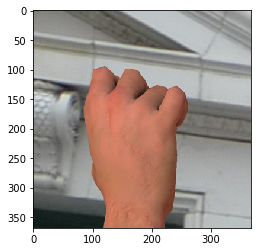

In [114]:
custom_dataset[3][0]